In [2]:
using DataFrames
using CSV
using LinearAlgebra
using Plots
using Statistics

In [3]:
# Minh
function linreg(x, y, lambda)
    m, n = size(x)
    z = x' * x + lambda * Matrix(I, n, n)  # the regularized matrix1
    lin_reg_param = inv(z) * x' * y
    return lin_reg_param
end


linreg (generic function with 1 method)

In [4]:
# Tu Pham
# Function to calculate predicted responses
function predict(linregparam, x)
    predicted_responses = x * linregparam
    return predicted_responses
end

# Function to calculate R^2
function rsq(predicted_responses, true_responses, mean_prediction)
    predictive_model_error = 0
    for i in eachindex(true_responses)
        predictive_model_error += ((true_responses[i] - predicted_responses[i]) ^ 2)
    end
    baseline_model_error = 0
    for i in eachindex(true_responses)
        baseline_model_error += ((true_responses[i] - mean_prediction) ^ 2)
    end
    r_squared = 1 - (predictive_model_error / baseline_model_error)
    return r_squared
end

rsq (generic function with 1 method)

In [5]:
path = "usconsumption.csv"
df = CSV.read(path, DataFrame)

Row,Quarter,Percent Change Consumption,Percent Change Income,Percent Change Production,Percent Change Savings,Change Unemployment
,String7,Float64,Float64,Float64,Float64,Float64
1,1960Q1,0.947824,1.1825,5.85456,3.18329,0.1
2,1960Q2,1.26048,0.625615,-2.19366,-4.81376,0.0
3,1960Q3,-0.400781,0.176703,-1.65811,5.3346,0.1
4,1960Q4,0.126736,-0.0418225,-2.44019,-1.30721,1.1
5,1961Q1,-0.0263901,0.966727,-1.52552,9.2915,0.3
6,1961Q2,1.47763,1.51217,3.88804,2.13531,0.0
7,1961Q3,0.48773,1.31975,3.14082,8.11255,-0.2
8,1961Q4,1.98331,1.91022,3.44642,1.50379,-0.7
9,1962Q1,1.05997,0.952471,1.48278,0.637622,-0.4


In [6]:
# Minh
filepath = "./usconsumption.csv"
df = CSV.read(filepath, DataFrame)
df[!, :Intercept] = ones(size(df, 1)) # create an Intercept column and fill it with 1s.

print(df)

227×7 DataFrame
 Row │ Quarter   Percent Change Consumption  Percent Change Income   Percent Change Production   Percent Change Savings   Change Unemployment  Intercept 
     │ String7  Float64                      Float64                Float64                     Float64                  Float64               Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1960Q1                     0.947824               1.1825                      5.85456                  3.18329                     0.1        1.0
   2 │ 1960Q2                     1.26048                0.625615                   -2.19366                 -4.81376                     0.0        1.0
   3 │ 1960Q3                    -0.400781               0.176703                   -1.65811                  5.3346                      0.1        1.0
   4 │ 1960Q4                     0.126736              -0.0418

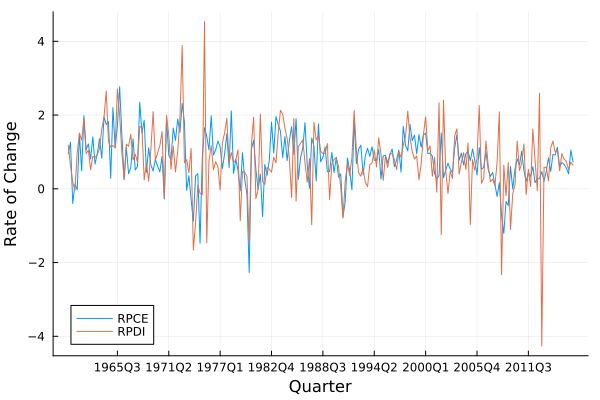

In [7]:
x = df[:, "Quarter"]
rpce = df[:, " Percent Change Consumption"]
rpdi = df[:, "Percent Change Income"]
plot(x, rpce, xlabel="Quarter", legend=true, label="RPCE")
plot!(x, rpdi, xlabel="Quarter", legend=true, label="RPDI")
ylabel!("Rate of Change")

In [8]:
# Matt Le
time_vector = df[:, "Quarter"]
real_RPCE = df[:, " Percent Change Consumption"]
real_RPDI = df[:, "Percent Change Income"]
intercept = df[:, "Intercept"]


RPDI_intercept_features = hcat(real_RPDI, intercept)
linregparam_with_RPDI_intercept = linreg(RPDI_intercept_features, real_RPCE , 0)

println("Weight for RPDI ", linregparam_with_RPDI_intercept[1])
println("Intercept ", linregparam_with_RPDI_intercept[2])

estimated_RPCE = predict(linregparam_with_RPDI_intercept, RPDI_intercept_features)
println("R squared is: ", rsq(estimated_RPCE, real_RPCE, mean(real_RPCE)))


Weight for RPDI 0.3203393714288064
Intercept 0.5518980112442429


R squared is: 0.18287279977698812


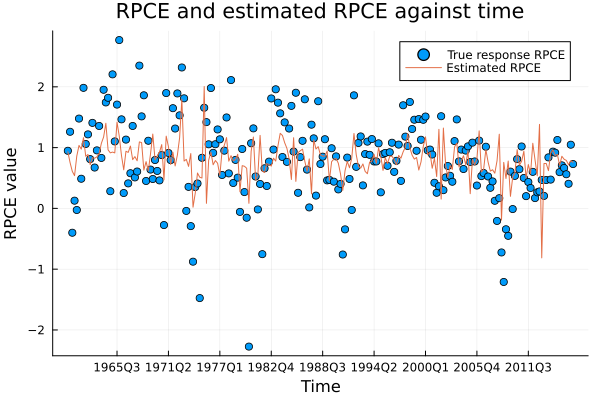

In [9]:
# Tu Pham
# Plot RPCE and estimated RPCE against time
function plot_RPCE(real_RPCE, estimated_RPCE, time_vector)
    plot(time_vector, real_RPCE, seriestype=:scatter, label="True response RPCE")
    plot!(time_vector, estimated_RPCE, label="Estimated RPCE")
    xlabel!("Time")
    ylabel!("RPCE value")
    title!("RPCE and estimated RPCE against time")
end
plot_RPCE(real_RPCE, estimated_RPCE, time_vector)

In [10]:
# Minh

# Building a matrix of features from all other features
mat = Matrix(df[:, 3:7])
y = (df[:, 2])
# println(size(mat))

result = linreg(mat, y, 0)

# Printing result
# ? Which one will go first?
println("Weight for RPDI: $(result[1])")
println("Weight for IP: $(result[2])")
println("Weight for PS: $(result[3])")
println("Weight for UR: $(result[4])")
println("Intercept: $(result[5])")


Weight for RPDI: 0.7537050372353764
Weight for IP: 0.03166918728313159
Weight for PS: -0.04897556981461185
Weight for UR: -0.24245971511268483
Intercept: 0.2543022935236794


In [11]:
# Matt
estimated_RPCE = predict(result, mat)
println("R squared is: ", rsq(estimated_RPCE, y, mean(y)))

println("R squared is increased from .18 to .76, which means that this model predicts the data more accurately.")




R squared is: 0.7609760633486973
R squared is increased from .18 to .76, which means that this model predicts the data more accurately.


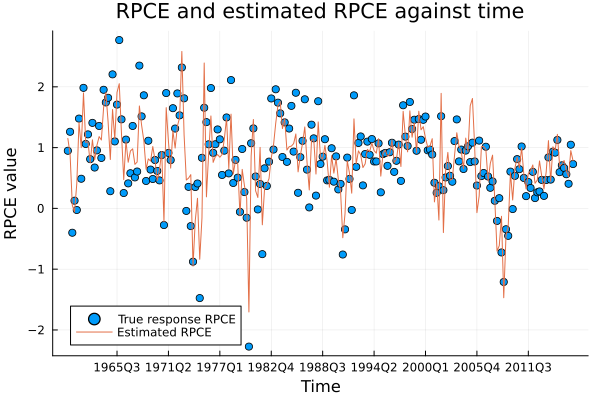

In [12]:
# Tu Pham
plot_RPCE(y, estimated_RPCE, time_vector)

In [13]:
# Minh
importance_dict = Dict("RPDI" => result[1], "IP" => result[2], "PS" => result[3], "UR" => result[4], "Intercept" => result[5])

# Turning into absolute values
for key in keys(importance_dict)
    importance_dict[key] = abs(importance_dict[key])
end

names = collect(keys(importance_dict))
weight = collect(values(importance_dict))

sorted_importance = sortperm(weight, rev = true)

sorted_attr = names[sorted_importance]

for index in 1:length(sorted_attr)
    println("$index. $(sorted_attr[index])")
end

1. RPDI
2. Intercept
3. UR
4. PS
5. IP


In [14]:
# Matt
function getModelWithDifferentReg(lambda)
    mat = Matrix(df[:, 3:7])
    y = (df[:, 2])


    result = linreg(mat, y, lambda)
    estimated_RPCE = predict(result, mat)
    println("R squared with regularization value ", lambda ," is : ", rsq(estimated_RPCE, y, mean(y)))

end

for lambda in [0, 0.001, 0.01, 0.1, 1]
    getModelWithDifferentReg(lambda)
end

println("The models proposed little to none changes in values to each other")

R squared with regularization value 0.0 is : 0.7609760633486973
R squared with regularization value 0.001 is : 0.7609760632606294
R squared with regularization value 0.01 is : 0.760976054548257
R squared with regularization value 0.1 is : 0.7609751895886392
R squared with regularization value 1.0 is : 0.7608944182343679
The models proposed little to none changes in values to each other


In [15]:
# Tu Pham
# function rsq(predicted_responses, true_responses, mean_prediction)
training_set = df[1:204, :]
test_set = df[205:227, :]

training_features = Matrix(training_set[:, 3:7])

real_training_RPCE = training_set[:, " Percent Change Consumption"]
real_test_RPCE = test_set[:, " Percent Change Consumption"]

training_linreg_param = linreg(training_features, real_training_RPCE, 0)
println("Regression parameters: ", training_linreg_param)
predicted_test_RPCE = predict(training_linreg_param, training_features)
r_squared_test = rsq(predicted_test_RPCE, real_test_RPCE, mean(real_test_RPCE))
println("R squared for test set ", r_squared_test)
println("This value of R squared is negative and it is much lower than the R squared metrics that we found before.")

Regression parameters: 

[0.7407063798830182, 0.021878378090151196, -0.047943112415759964, -0.31257254028496995, 0.28530124239835475]
R squared for test set -7.243678481640641
This value of R squared is negative and it is much lower than the R squared metrics that we found before.


In [16]:
# Matt
function getSequentialModel(i)
    

    features = Matrix(df[205:i,[3,4,5,6,7]])

    real_RPCE = (df[205:i, 2])
    estimated_RPCE = predict(result, features)
    rsq(estimated_RPCE, real_RPCE, mean(real_RPCE))
end


for i in 205:227
    println("The R squared from models build by quarters up to ", df[i, "Quarter"], " is ", getSequentialModel(i))
end

println("The R squared from models build by the sequential technique has more reliable results except for the first quarter in which the value if negative infinity. On the other hand, the R square values from other quarters going forward produces more accurate results")

The R squared from models build by quarters up to 2011Q1 is -Inf
The R squared from models build by quarters up to 2011Q2 is 0.6209830121410576
The R squared from models build by quarters up to 2011Q3 is 0.24601957345502912
The R squared from models build by quarters up to 2011Q4 is -1.2991944629949144
The R squared from models build by quarters up to 2012Q1 is -0.37303063926598434
The R squared from models build by quarters up to 2012Q2 is -0.3076750580723411
The R squared from models build by quarters up to 2012Q3 is -0.48150525654860377
The R squared from models build by quarters up to 2012Q4 is -2.0037246529003205
The R squared from models build by quarters up to 2013Q1 is -1.7991674861628026
The R squared from models build by quarters up to 2013Q2 is -1.5509741817898686
The R squared from models build by quarters up to 2013Q3 is -1.4786872500293358
The R squared from models build by quarters up to 2013Q4 is -0.4043989007496689
The R squared from models build by quarters up to 2014

In [17]:
# Minh
using Statistics

function mod_linreg(x, y)
    n = length(x)
    z = x' * x # the regularized matrix
    lin_reg_param = inv(z) * x' * y
    return lin_reg_param
end

matrix = Matrix(df)
# Create a column vector of zeros with the same number of rows as the matrix
zeros_column = zeros(size(matrix, 1))

# Use hcat to horizontally concatenate the matrix and the column of zeros
matrix_ar = hcat(matrix, zeros_column)

range = 3:8
previous = 0
val_collection = Vector{Float64}()

for row in eachrow(matrix_ar)
    row[8] = previous
    feature = row[range]
    param = mod_linreg(feature, row[2])
    est_value = dot(param, feature)
    push!(val_collection, est_value)
    previous = est_value
end

plot_RPCE(real_RPCE, val_collection, time_vector)
r_sqr = rsq(val_collection, real_RPCE, mean(real_RPCE))
println(r_sqr)

BoundsError: BoundsError: attempt to access Tuple{Int64} at index [2]